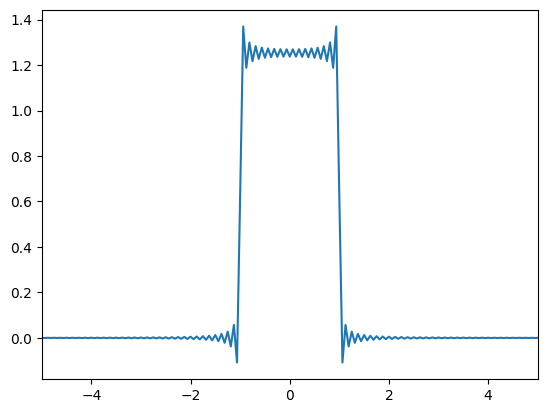

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def target_function(x):
    if x == 0:
        return 1
    else:
        return np.sin(x) / x

# Define parameters
x_min_value = -50
x_max_value = 50
num_points = 200
delta_x = (x_max_value - x_min_value) / (num_points - 1)

# Sample the function
samples = []
for i in range(num_points):
    samples.append(target_function(x_min_value + i * delta_x))

# Perform Discrete Fourier Transform
dft_result = np.fft.fft(samples, norm='ortho')
frequencies = (2 * np.pi / delta_x) * np.fft.fftfreq(num_points)

# Sort the results based on frequency
sorted_results = []
for i in range(num_points):
    sorted_results.append([frequencies[i], dft_result[i]])

sorted_results.sort(key=lambda x: x[0])

final_frequencies, final_dft_result = [], []
for index in range(num_points):
    final_dft_result.append(delta_x * (num_points / (2 * np.pi)) ** 0.5 * np.exp(-1j * x_min_value * sorted_results[index][0]) * sorted_results[index][1])
    final_frequencies.append(sorted_results[index][0])

# Plot the transformed function
plt.plot(final_frequencies, final_dft_result)
plt.xlim(-5, 5)
plt.show()
